# **SME0142 - Álgebra Linear e Aplicações**
Docente: Cynthia de Oliveira Lage Ferreira


# **Trabalho Prático**
16 de novembro de 2022

# Aluno:

# Orientações Gerais

*   Esta avaliação é **individual** e deverá ser desenvolvida na plataforma Colab (https://colab.research.google.com/).

*   Cada aluno deverá produzir um arquivo .ipynb contendo as soluções dos exercícios. Sejam organizados !

*   Os arquivos deverão estar identificados por **NOMEDOALUNO-NoUSP-TURMA.ipynb** a fim de facilitar a organização das atividades pela professora.

*  Os arquivos deverão ser enviados **até às 20h do dia 19/11** através da plataforma e-disciplinas da USP (https://edisciplinas.usp.br/). **Os arquivos recebidos por e-mail não serão corrigidos.** Arquivos enviados fora do prazo também não serão corrigidos!

*   Apenas os alunos que estiverem com a **situação regularizada no Sistema Jupiter** terão suas avaliações corrigidas.

*  Todos os códigos utilizados para resolver os problemas deverão ser apresentados, executados e minimamente comentados. **Questões com respostas sem justificativas não serão consideradas.**

**BOA PROVA!**

In [12]:
#Bibliotecas Utilizadas
import numpy as np
import matplotlib.pyplot as plt

# **Exercício 1**
Considere o espaço vetorial real $\mathbb{R}^2$. Sejam as transformações
- $T_1:\mathbb{R}^2 \to \mathbb{R}^2$ tal que $T_1(x,y)=(-x,y)$ - **reflexão em torno do eixo $oy$**;
- $T_2:\mathbb{R}^2 \to \mathbb{R}^2$ tal que a matriz da transformação é dada por
$$[T_2] = \begin{bmatrix} 1 & k \\ 0 & 1 \end{bmatrix},$$
com $k\in\mathbb{R}$ - **cisalhamento horizontal**.

1. Aplique as transformações $T_1$ e $T_2$ no quadrado de vértices $(0,0)$, $(1,0)$, $(1,1)$ e $(0,1)$ considerando o parâmetro $k= -0,5$ e visualize os resultados;
2. Determine a matriz da transformação $T_3$ que primeiro faz um cisalhamento horizontal com $k=-0.5$ mapeando $e_2$ em $e_2 - 0.5e_1$ ($e_1$ se mantém inalterado) e então reflete o resultado em torno do eixo $oy$. **Dica:** Determine a posição final das imagens de $e_1$ e $e_2$.
3. Qual a relação entre as matrizes $[T_1]$, $[T_2]$ e a matriz da transformação $[T_3]$ obtida no item anterior?
4. Determine a transformação de reflexão em torno do eixo $ox$ e a transformação de cisalhamento vertical.

Text(0.5, 1.0, 'Cisalhamento')

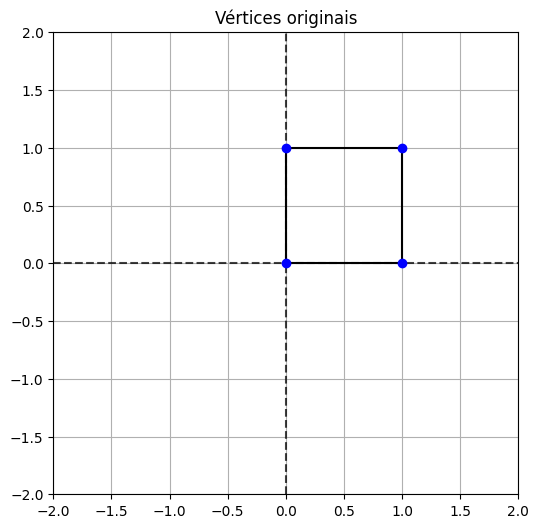

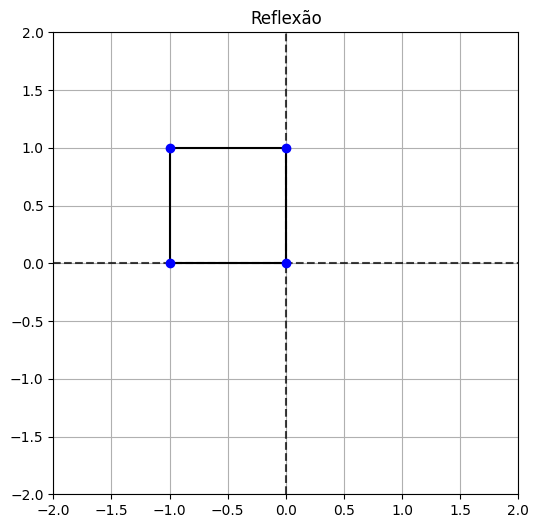

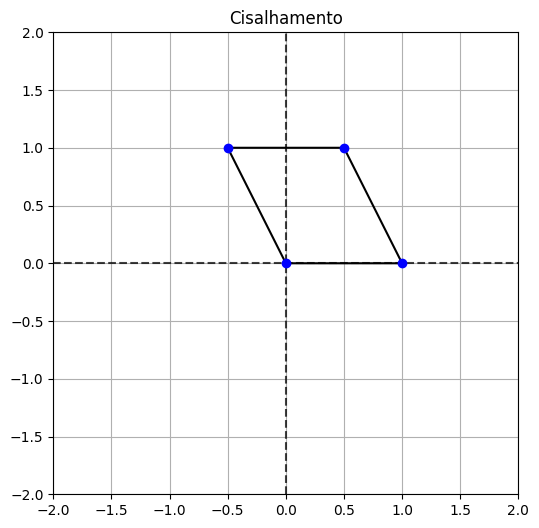

In [13]:


# Solução 1
# Vértices do quadrado

Q = np.array([[0,0],[1,0],[1,1],[0,1]]).T

# Reflexão em torno do eixo y
# (-x,y) = x(-1,0) + y(0,1)
T1 = np.array([[-1, 0], [0, 1]])

# Cisalhamento horizontal
k = -0.5
T2 = np.array([[1, k], [0, 1]])

# Aplicando as transformações
T1Q = T1@Q
T2Q = T2@Q

def plotSimples(vx, vy):
  plt.figure(figsize=(6,6))
  plt.axis([-2, 2, -2, 2])
  plt.plot([-2,2], [0,0], 'k--', alpha=0.75)
  plt.plot([0,0], [-2,2],'k--', alpha=0.75)
  plt.plot(vx, vy, 'k')
  plt.plot([vx[0], vx[-1]], [vy[0], vy[-1]], 'k')
  plt.plot(vx, vy, 'bo')
  plt.grid('True')

# Plots
plotSimples(Q[0,:], Q[1,:])
plt.title('Vértices originais')

plotSimples(T1Q[0,:], T1Q[1,:])
plt.title('Reflexão')

plotSimples(T2Q[0,:], T2Q[1,:])
plt.title('Cisalhamento')

[[-1.   0.5]
 [ 0.   1. ]]
[[-1.   0.5]
 [ 0.   1. ]]
==
[[-1.   0.5]
 [ 0.   1. ]]


Text(0.5, 1.0, 'Cisalhamento vertical')

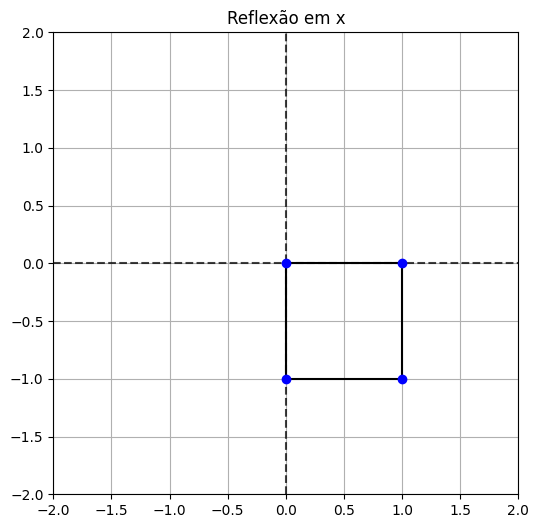

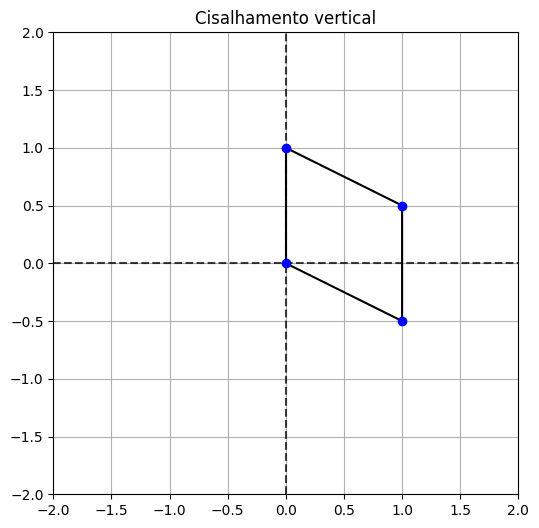

In [14]:
#Solução 2)
# Observando as posições finais de e1 e e2 temos:
# T3(1,0) = (-1,0)
# T3(0,1) = (0.5,1)
T3 = np.array([[-1, 0.5], [0, 1]])
print(T3)

# Solução 3)
# Por outro lado, aplicando T2, depois T1
print(T1 @ T2)
print("==")
print(T3)

# Solução 4)
# Reflexão em torno do eixo x
T4 =  np.array([[1, 0], [0, -1]])

# Cisalhamento vertical
T5 = np.array([[1, 0], [k, 1]])

# Aplicando as transformações
T4Q = T4 @ Q
T5Q = T5 @ Q

# Plots
plotSimples(T4Q[0,:], T4Q[1,:])
plt.title('Reflexão em x')

plotSimples(T5Q[0,:], T5Q[1,:])
plt.title('Cisalhamento vertical')

# **Exercício 2** 
Considere a transformação $T:R^7 \rightarrow R^3$ linear dada pela matriz

$$
\left(\begin{array}{ccccccc}
3 & 9 & 6 & 6 & 9 & 3 & 1\\
2 & 0 & 9 & 2 & 0 & 5 & 3\\
0 & 0 & 1 & 0 & 1 & 0 & 2
\end{array}\right)
$$

a) Qual a dimensão do núcleo e da imagem da transformação? Faça um código para determinar a dimensão da imagem e conclua, então, a dimensão do núcleo. 
 
b) Encontre uma base para o espaço núcleo.

c) Faça um código para verificar que a base encontrada está gerando o núcleo.

In [15]:
# A)
B = np.asarray([[3, 9, 6, 6, 9, 3, 1],
                [2, 0, 9, 2, 0, 5, 3],
                [0, 0, 1 , 0, 1, 0, 2]])


# Precisamos encontrar 3 vetores que sejam LI
# Podemos encontrar esses vetores na transposta de B

BT = B.T

try:
    for i in range(7):
        for j in range(7):
            for k in range(7):
                if i != j and j != k and i != k:
                    if np.linalg.det([BT[i], BT[j], BT[k]]) != 0:
                        print('Existem vetores LI, que são: ')
                        print(BT[i], BT[j], BT[k])
                        raise StopIteration
except StopIteration:
    pass

# Agora que vimos que existem 3 vetores em LI, então a dimensão da imagem é 3
# Usando a fórmula dim(Nucleo) + dim(Imagem) = dim(V), temos que a dimensão do nucleo é 4

Existem vetores LI, que são: 
[3 2 0] [9 0 0] [6 9 1]


In [22]:
# B)
import scipy
# O método null_space retorna uma base ortonormal com valores nulos.
print(scipy.linalg.null_space(B))


[[-0.27586983 -0.62563368 -0.21941915 -0.64618533]
 [-0.28500522 -0.3485506   0.07477432  0.58118027]
 [-0.15736608  0.27373818 -0.45233629  0.18376489]
 [ 0.88663161 -0.13669058 -0.10547226 -0.0578782 ]
 [-0.1103035   0.49419922  0.07240306 -0.42270621]
 [-0.04134664  0.0425822   0.83018191 -0.12083379]
 [ 0.13383479 -0.3839687   0.18996661  0.11947066]]


In [25]:

# C)
# Agora precisamos ver se essa base está de fato gerando o núcleo
# Para isso, é necessário multiplicar a base com o kernel, e, se isso resultar em uma matriz nula, então ela gera o núcleo 
print(np.around(B@scipy.linalg.null_space(B)))

[[-0. -0. -0. -0.]
 [ 0. -0.  0.  0.]
 [ 0.  0.  0. -0.]]


# **Exercício 3**

a) Dada uma base qualquer de um subespaço vetorial do $R^{n}$, escreva um código para encontrar uma base ortonormal para este subespaço. Teste o seu código para a base dada pelas colunas da matriz  **V**  gerada no código abaixo. 

b) Faça um teste para verificar que a base obtida é de fato ortonormal.

In [17]:
V = np.random.randint(0,20,size=(20,10))
print(V)

[[ 4  1 12 17 18 17 15 15 14 10]
 [18 14  2  9 15  7  2 14 10 13]
 [ 8 19  9  2 17  3  2  2 12  6]
 [16  7 17  3 15 19  3  2  9 14]
 [ 0 19 13 15  1  8  5 17 18  8]
 [ 8 10  7 15 14  3 11 14 14  8]
 [ 1  1 14  1 15 15  6  4  4 10]
 [14 13 13  0  2  3 12 18  3 19]
 [18  8  0  5 11 19 16  8  2  2]
 [ 0  1  5 16  4 12  8 12  6  6]
 [13 17  9 10  3  9 14 12  9 17]
 [16 10  8 18  5  7  1 16 13 11]
 [ 9  1  9  3  6 18  7  9 19  7]
 [13 14  2 18  5  4 10  3  9 18]
 [16 19  8 12  1 18  1 14 13 19]
 [ 8 18 16 19  6 13 19 13  4 16]
 [ 9  6 15 16  3 11  9 10  3 11]
 [ 6  8  3  7  3  3  1 14 10 17]
 [13 15 17  2 16  2 10 11 15  3]
 [17 19  6 18  0  3  7 13  0  7]]


In [18]:
# a) Ortonormalização de uma base qualquer dada e teste do código em V

# Gram-Schmidt Mod
def gramSchmidt(X):
    V = X.copy()
    Q = np.zeros(X.shape)
    for j in range(X.shape[1]):
        qj = V[:,j] / np.linalg.norm(V[:,j])
        for k in range(j+1, X.shape[1]):
            V[:,k] = V[:,k] - np.dot(V[:,k], qj) * qj   
        Q[:,j] = qj
    return Q

Q2 = gramSchmidt(V)
print(Q2)


[[ 0.07539122 -0.06884284  0.32907259  0.40707212  0.34174306  0.
   0.07124705  0.14664712  0.          0.        ]
 [ 0.33926051 -0.06884284 -0.29250897  0.          0.34174306 -0.05538488
  -0.21374115  0.29329423 -0.07559289  0.        ]
 [ 0.15078245  0.37863561 -0.07312724 -0.27138141  0.51261459  0.
  -0.1424941  -0.14664712 -0.07559289  0.        ]
 [ 0.30156489 -0.24094994  0.32907259 -0.16961338  0.          0.05538488
  -0.35623525 -0.36661779  0.          0.        ]
 [ 0.          0.65400697  0.14625448  0.03392268 -0.08543577  0.22153951
   0.          0.07332356  0.22677868 -0.09365858]
 [ 0.15078245  0.06884284  0.          0.23745874  0.29902518 -0.22153951
   0.1424941   0.07332356  0.22677868  0.        ]
 [ 0.01884781  0.          0.47532708 -0.13569071  0.2563073   0.16615463
   0.          0.         -0.22677868  0.18731716]
 [ 0.26386928  0.          0.14625448 -0.37314944 -0.29902518 -0.11076976
   0.2849882   0.43994135 -0.07559289  0.18731716]
 [ 0.33926051 -0

In [19]:
# b) Teste que verifica se a base obtida é de fato ortonormal
print(np.around(Q2.T @ Q2))

[[ 1. -0. -0.  0. -0.  0. -0.  0. -0. -0.]
 [-0.  1.  0. -0.  0.  0.  0. -0. -0.  0.]
 [-0.  0.  1.  0. -0. -0. -0. -0.  0. -0.]
 [ 0. -0.  0.  1. -0.  0.  0. -0. -0.  0.]
 [-0.  0. -0. -0.  1. -0.  0. -0.  0. -0.]
 [ 0.  0. -0.  0. -0.  1.  0. -0.  0.  0.]
 [-0.  0. -0.  0.  0.  0.  1.  0. -0.  0.]
 [ 0. -0. -0. -0. -0. -0.  0.  1. -0.  0.]
 [-0. -0.  0. -0.  0.  0. -0. -0.  1. -0.]
 [-0.  0. -0.  0. -0.  0.  0.  0. -0.  1.]]


# **Exercício 4**

O crescimento populacional do Brasil ao longo dos anos pode ser observado na tabela abaixo, de acordo com dados do Censo-IBGE: 


Ano | População (milhões)
--- | :---: 
1872 | 9,9
1890 | 14,3
1900 | 17,4
1920 | 30,6
1940 | 41,2
1950 | 51,9
1960 | 70,9
1970 | 94,5
1980 | 121,1
1991 | 146,9
2000 | 169,5
2010 | 190,7


Tabela: *População do Brasil, em milhões de pessoas, entre os anos de 1872-2010. Dados Censo-IBGE.*



O último Censo foi realizado em 2010 e, devido à pandemia da Covid-19, o de 2020 foi adiado. Por isso, não é possível saber, com maior precisão, a população atual do país. Com o objetivo de estimar a população do Brasil em 2022, ajuste, no sentido dos mínimos quadrados, uma reta e uma parábola aos dados representados na tabela.

a) Qual das duas aproximações você considera melhor para estimar a população atual do país ? Justifique a sua resposta calculando o erro da aproximação. Mostre, também, os gráficos das duas aproximações obtidas.

b) Qual seria a população estimada do Brasil em 2022 ? Justifique.

426.97099450062274
P_1(x) = -2510.549431349683 + 1.3294056868749173x
20.77575949286342
P_2(x) = 43726.26566442498 + -46.317089618571615x + 0.01226857853552309x^2


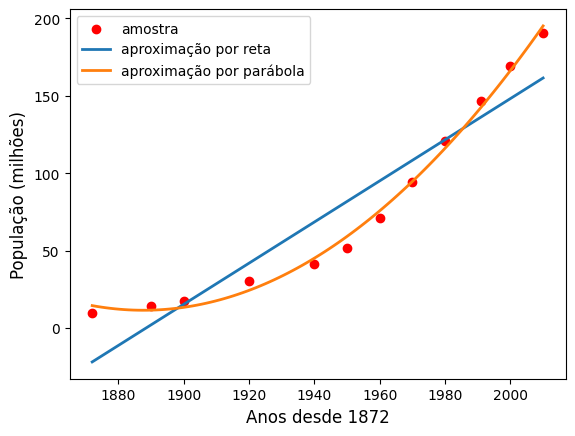

In [20]:
x = np.array([1872, 1890, 1900, 1920, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2010])
y = np.array([9.9, 14.3, 17.4, 30.6, 41.2, 51.9, 70.9, 94.5, 121.1, 146.9, 169.5, 190.7])

# Resolvendo X^T.X a = X^T y (X matriz de Vandermond)
def min_squares(x, y, m):
  A = np.vander(x, m, increasing=True) # Assim facilita usar o polyval
  AtA = np.dot(A.T, A)
  Atb = np.dot(A.T, y)
  alpha = np.linalg.solve(AtA, Atb)
  return alpha


# Calculando o erro da aproximação
def min_squares_error(X, Y, p):
  erro = np.linalg.norm(p(X) - Y)**2 / X.shape[0]
  return erro

alfa_reta = min_squares(x, y, 2) # calcula o sistema com m=2 (reta)
p_reta = lambda x:  alfa_reta[0] + alfa_reta[1] * x # Definindo P1(x) 
print(min_squares_error(x, y, p_reta)) # erro de aproximação
print(f'P_1(x) = {alfa_reta[0]} + {alfa_reta[1]}x') # imprime P1(x)

alfa_parabola = min_squares(x, y, 3) # calcula o sistema com m=3 (parabola)
p_parabola = lambda x: alfa_parabola[0] + alfa_parabola[1] * x + alfa_parabola[2] * (x**2) # Definindo P2(x) 
print(min_squares_error(x, y, p_parabola)) # erro de aproximação
print(f'P_2(x) = {alfa_parabola[0]} + {alfa_parabola[1]}x + {alfa_parabola[2]}x^2') # imprime P2(x)

x_dist = np.linspace(1872, 2010, num=100)

plt.scatter(x,y,label = 'amostra',linewidth = 1,color='red')
plt.plot(x_dist,p_reta(x_dist),label = 'aproximação por reta',linewidth = 2)
plt.plot(x_dist,p_parabola(x_dist),label = 'aproximação por parábola',linewidth = 2)
plt.xlabel('Anos desde 1872',fontsize='large')
plt.ylabel('População (milhões)',fontsize='large')
plt.legend()
plt.show()

In [21]:
# b)

# Já que a parábola se ajusta melhor aos dados, iremos considerá-la para predizer a população
print(f'A população no ano de 2022 deve ser de {round(p_parabola(2022))} milhões')

A população no ano de 2022 deve ser de 233 milhões
